In [ ]:
#We need to install tf version 2.15 for compatibility with this notebook (written in March 2024).
!pip uninstall tensorflow
!pip install tensorflow==2.15.0
!tensorflow --version

: 

In [3]:
# Introduction to neural network classification with TensorFlow


# Introduction to neural network classification with TensorFlow

In this notebook we will learn how to write neural networks for classification problems.  

Classification problem is where you try to classify something as one thing or another.
* Binary classification
* Multiclass classificaiton
* Multilabel classificaiton

In [4]:
# Creating data to view and fit

from sklearn.datasets import make_circles
import tensorflow as tf

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [5]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand.  Let's visualize it

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


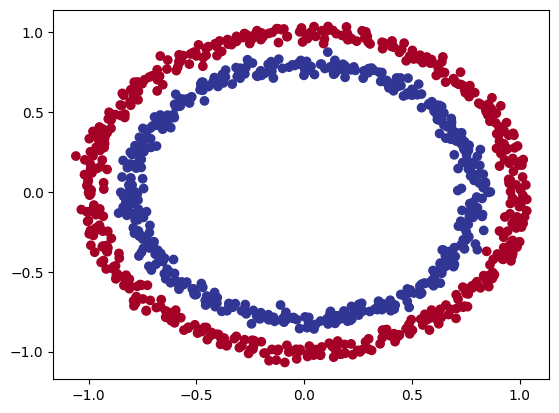

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [9]:
#Check the shapes of our features and labels
X.shape, y.shape


((1000, 2), (1000,))

In [10]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Shapes in modelling


In [12]:
#set random seet
tf.random.set_seed(42)

#!. Create a model specific to your problem
model_1 = tf.keras.Sequential([
    #tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Dense(1)
    #tf.keras.layers.Dense(100,activation="relu"),
    #tf.keras.layers.Dense(300,activation="softmax")
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )

#3. Fit the model
model_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.1383 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.4540
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4860


In [13]:
#Let's try and improve our model and train it for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, it is performing as if it's guessing.  So let's step things up a notch and add an extra layer

In [14]:
#Set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

#2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
#4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.693728506565094, 0.5]

Improving our model

In [16]:
#Set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with two layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will
* take in a trained model, features X and labels y,
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the different zones where each unique class falls

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  '''
  plots the decision boundary created by a model predicting on X.
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  #Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


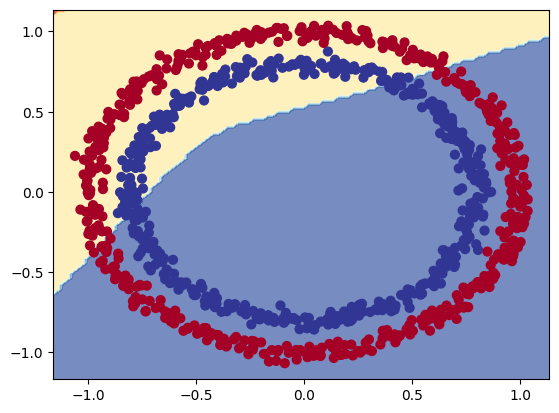

In [18]:
#Check the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [19]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)

y_regression = tf.range(100, 1100, 5) #y = X + 100

# Lets split our data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
#set random seed
tf.random.set_seed(42)

#create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 552.7165 - mae: 552.7165
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 427.0983 - mae: 427.0983
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 325.6160 - mae: 325.6160
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 267.5913 - mae: 267.5913
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 257.4731 - mae: 257.4731
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 264.4523 - mae: 264.4523
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 262.6125 - mae: 262.6125
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 256.6418 - mae: 256.6418
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 259.4655 - mae: 259.4655
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 256.7925 - mae: 256.7925
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 6ms/step


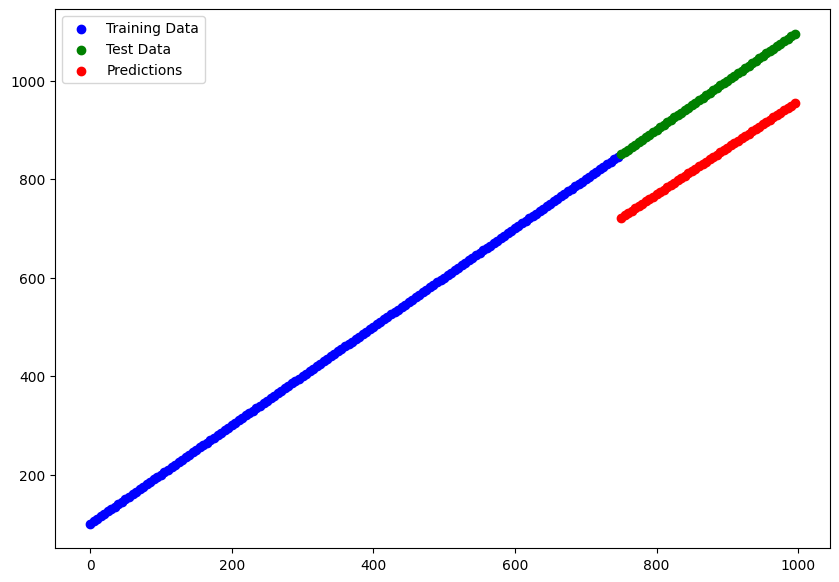

In [21]:
#Make predictions with our trained model
y_reg_preds = model_4.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

# The missing piece - non-linearity

In [22]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.linear),
])

#2. Compile our model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3210 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2790 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2711 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2693 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2581 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2445 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2301 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1807 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1625 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1097 - accuracy: 0.4700
Epoch 11/

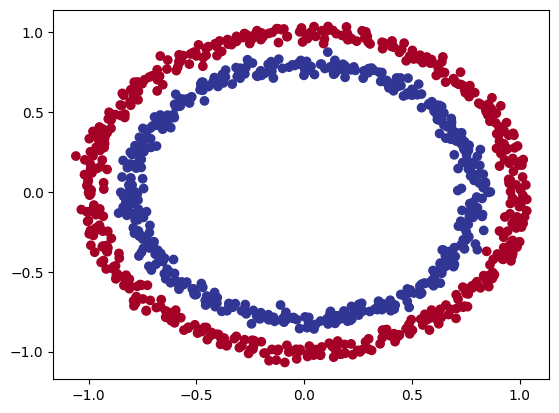

In [23]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


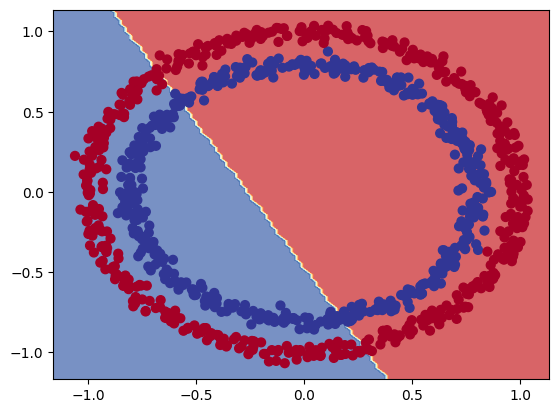

In [24]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Lets try to build our first neural network with a non-linear activation function

In [25]:
#set random seed
tf.random.set_seed(42)

#1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

#2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3308 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2153 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0648 - accuracy: 0.4420
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0034 - accuracy: 0.4380
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9843 - accuracy: 0.4330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9773 - accuracy: 0.4320
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9539 - accuracy: 0.4310
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9151 - accuracy: 0.4310
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8841 - accuracy: 0.4270
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8483 - accuracy: 0.4220
Epoch 11/


Time to replicate the multi-layer NN from playground in code

In [26]:
#set random seed
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2. Compile model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 4.1995 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.1264 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 2.4520 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.8216 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.7765 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.7465 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.7177 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.6893 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6620 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6353 - accuracy: 0.5000
Epoch 11/

In [27]:
#Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5320


[0.6899582743644714, 0.5320000052452087]

313/313 [==============================] - 1s 2ms/step
doing binary classification


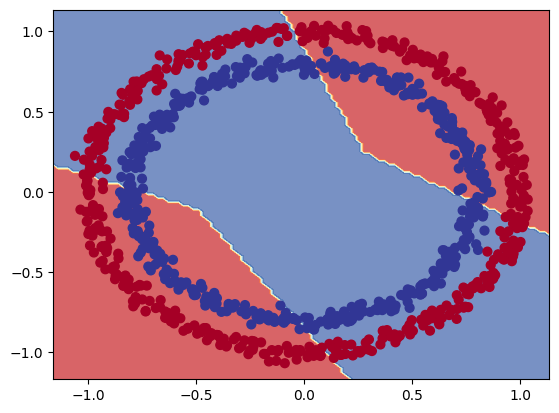

In [28]:
#How do our model predicitons look?
plot_decision_boundary(model_7, X, y)

In [29]:
#Lets make sigmoid output layer

#set random seed
tf.random.set_seed(42)

#1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit model
history = model_8.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.7098 - accuracy: 0.5030
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.4810
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4400
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4830
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4950
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4840
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4820
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4890
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4580
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4990
Epoch 11/

In [30]:
#Evaluate model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9390


[0.21901185810565948, 0.9390000104904175]

313/313 [==============================] - 0s 1ms/step
doing binary classification


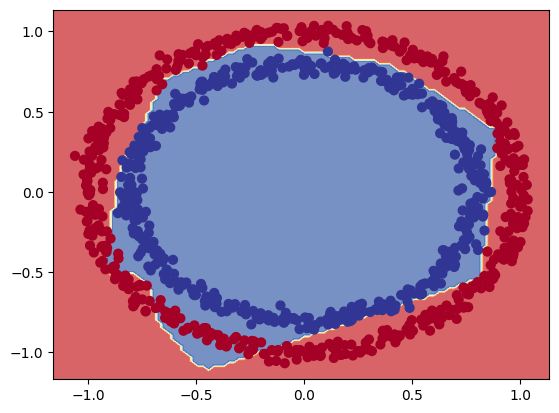

In [31]:
#Plot visually
plot_decision_boundary(model_8, X, y)

** What's wrong with our predictions we've made?  Are they really evaluating our model correctly?  Hint: What data did the model learn on and what data did we predict on?


🔑 ** Note ** The combination of straight and non-straight lines is one of the key fundamental of neural networks

Now we've discussed the concept of linear and non-linear functions.  Let's see them in action.  

In [32]:
# Create a toy tensor (similar to the data we pass into our models).
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

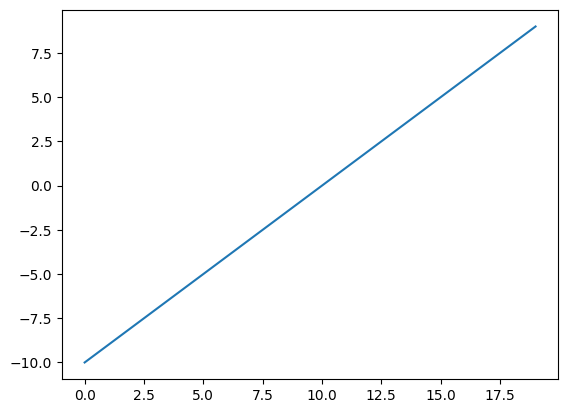

In [33]:
#Visualize our toy tensor
plt.plot(A)

In [34]:
#Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

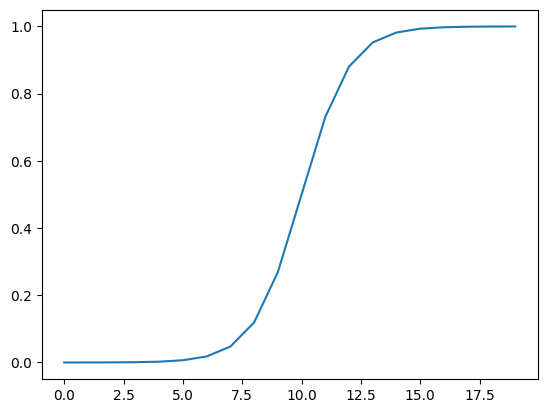

In [35]:
#Plot our tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [36]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

#Let's pass our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

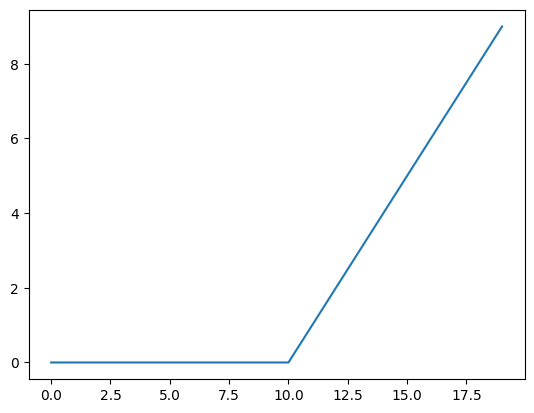

In [37]:
#Plot ReLU-modified tensor
plt.plot(relu(A))

In [38]:
#Let's try the linear activation function
def linear(x):
  return x

# Evaluating and improving our sigmoid model

So far we have been training and testing on same dataset.  However in machine laerning this is bascially a sin.  So let's create training and test set.

In [39]:
#Let's check how many examples we have
len(X)

1000

In [40]:
#Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

#X_train, y_train

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [41]:
#Let's recreate a model to fit on the training data and evaluate on the test data

#set random seed
tf.random.set_seed(42)

#1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.1),
                metrics=["accuracy"])

#3. Fit the model
history = model_9.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5200
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5175
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5225
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5175
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5213
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5362
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5412
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5462
Epoch 11/

In [42]:
#Evaluate the model
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.9900


[0.31705594062805176, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


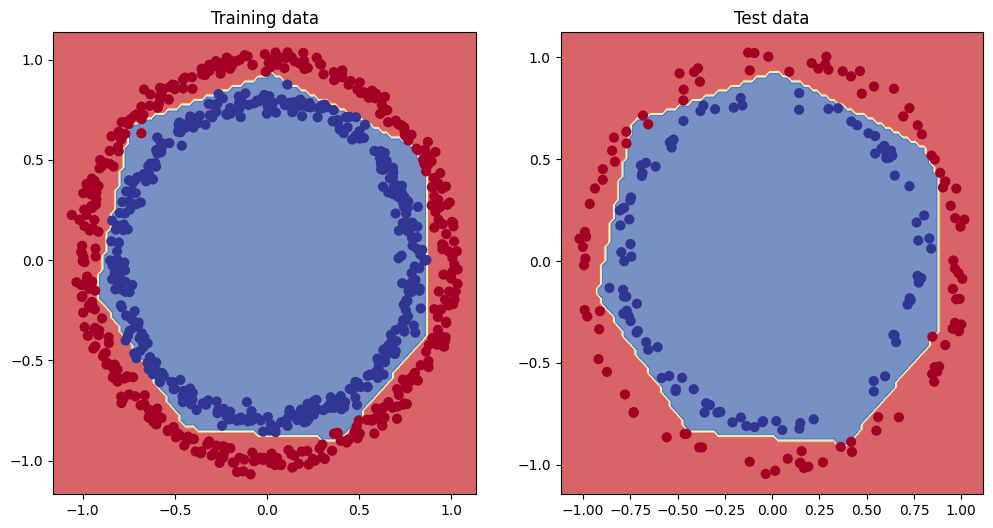

In [43]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

Plot the loss (or training) curves

In [44]:
history.history

{'loss': [0.6927251219749451,
  0.6915217041969299,
  0.6905063390731812,
  0.6895830035209656,
  0.6887190341949463,
  0.6879928708076477,
  0.6870723962783813,
  0.6865667104721069,
  0.6858440637588501,
  0.6850155591964722,
  0.6844331622123718,
  0.683759868144989,
  0.6829033493995667,
  0.6821984648704529,
  0.6815796494483948,
  0.6802722811698914,
  0.6793879866600037,
  0.6782911419868469,
  0.6777063608169556,
  0.6768540740013123,
  0.6759124994277954,
  0.6750012040138245,
  0.6742837429046631,
  0.6734235286712646,
  0.6725570559501648,
  0.6717900037765503,
  0.670976996421814,
  0.6698889136314392,
  0.669158399105072,
  0.668171763420105,
  0.6672540903091431,
  0.666118323802948,
  0.6651082634925842,
  0.6640450358390808,
  0.6631883978843689,
  0.6617529988288879,
  0.6605377197265625,
  0.6596912145614624,
  0.657866358757019,
  0.6558987498283386,
  0.6526683568954468,
  0.650301992893219,
  0.6485576033592224,
  0.6464015245437622,
  0.6443634629249573,
  0.64228

In [45]:
#Convert the history object into a dataframe.
pd.DataFrame(history.history)

,loss,accuracy
0,0.692725,0.50875
1,0.691522,0.51500
2,0.690506,0.52000
3,0.689583,0.51750
4,0.688719,0.52250
...,...,...
95,0.350602,0.98750
96,0.345621,0.98625
97,0.338526,0.99000
98,0.332391,0.98875


Text(0.5, 1.0, 'Model_9 loss curves')

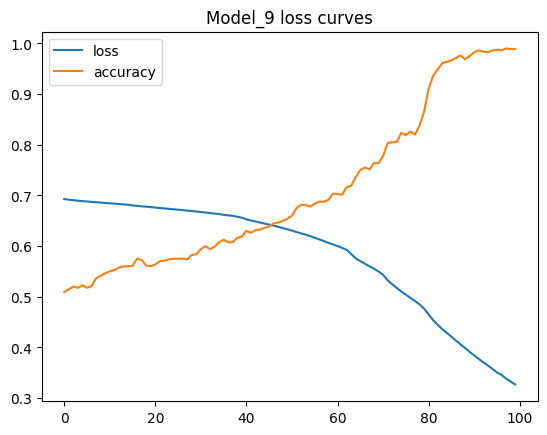

In [46]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves")


🔑 ** Note: ** for many problems the loss function going down means the model is improving.  The predictions it is making are getting closer to the ground truth labels.

# Finding the ideal learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model while it's training
* Another model (we could use the same one as above, but we are practicing building models here)
* A modified loss curves plot

In [47]:
# set random seed
tf.random.set_seed(42)

#1. Create our model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#3. Fit the model passing the scheduler
history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

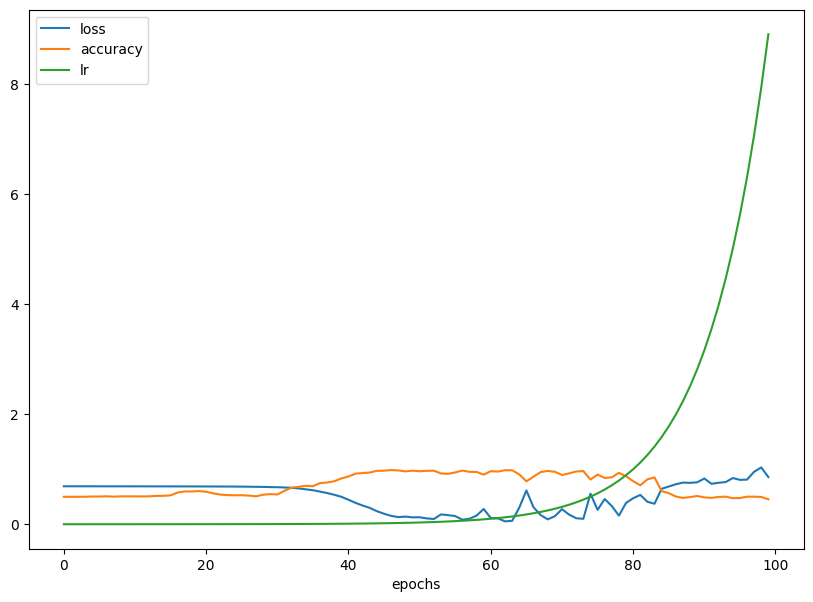

In [48]:
#Checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs")


Text(0.5, 1.0, 'Learning Rate vs Loss')

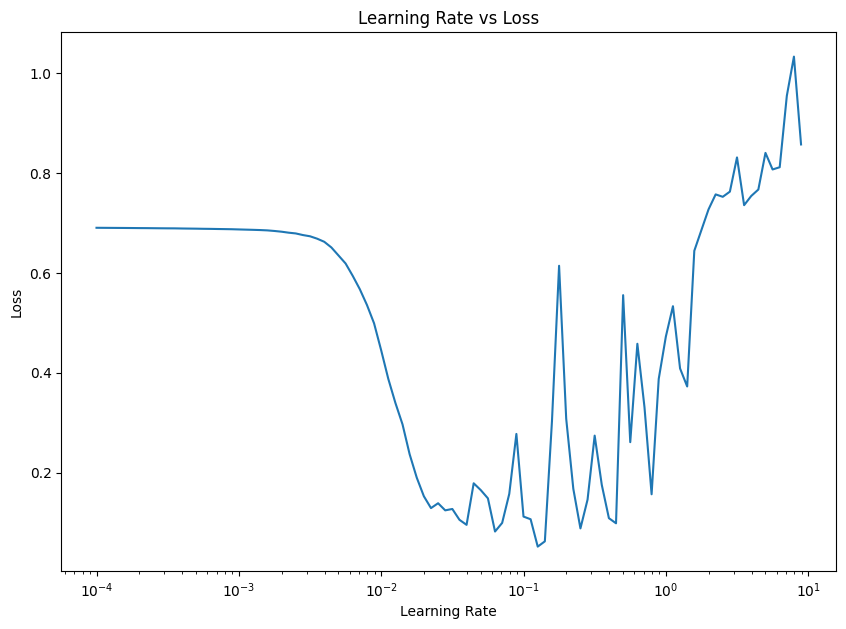

In [49]:
#Plot the learning rate vs. the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")


In [50]:
len(lrs)

100

In [51]:
#Creating a new model based on the ideal learning rate after checking callback function above

#Set random seed
tf.random.set_seed(42)

#1. Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2.Compile the model
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.007),
                 metrics="accuracy")

#3. Fit the model
model_11.fit(X_train, y_train, epochs=50)


Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.7201 - accuracy: 0.5025
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5050
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5113
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5200
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5250
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5263
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5337
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5375
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5612
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5825
Epoch 11/50
25/25 [

In [52]:
# evaluate model 11 on the test dataset
model_11.evaluate(X_test,y_test)
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.9900


[0.31705594062805176, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


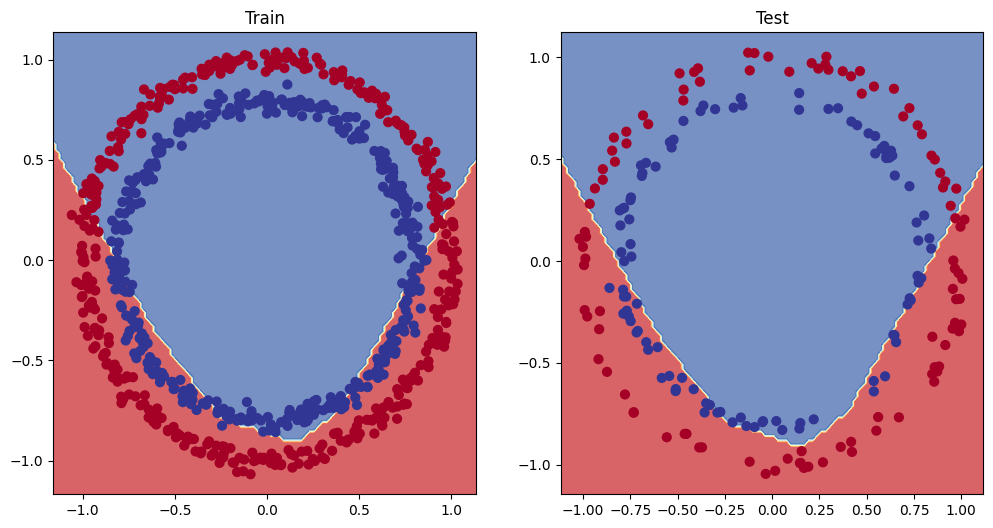

In [53]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11, X_test, y_test)
plt.show()

# Classification evaluation metrics:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion matrix
6. Classification report from sci-kit learn

## More classficiation evaluation methods
Alongside visualizing our model results as much as possible, there are a handful of other classification evaluation metrics and methods you should be familiar with.

In [54]:
#Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6100
Model loss on the test set: 0.6473057270050049
Model accuracy on the test set: 61.00%


How about a confusion matrix?


In [55]:
from sklearn.metrics import confusion_matrix

#Make preditions
y_preds = model_11.predict(X_test)

#Create confusion matrix
#confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


Oops, look like our predictions array has come out in **predictions probability** form... the standard output for the sigmoid or softmax activation functions

In [56]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [57]:
#Create our confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[57, 44],
       [34, 65]])

How about we prettify our confusion matrix

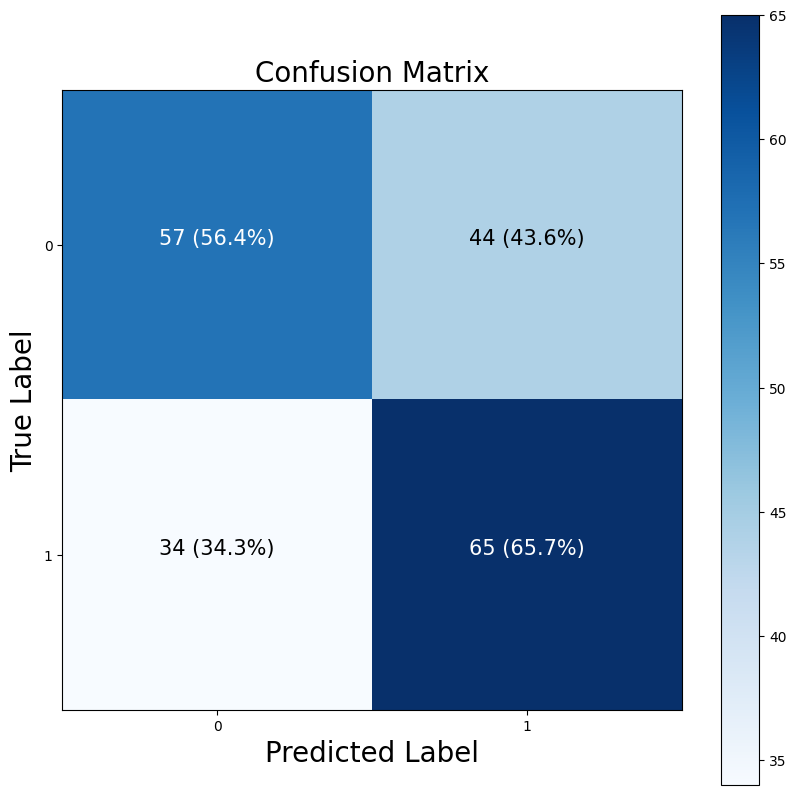

In [58]:
#Note the confusion matrix code we are about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for different colours
threshold = (cm.max() + cm.min()) / 2

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
          horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

In [59]:
cm.shape[0]

2

In [60]:
cm_norm

array([[0.56435644, 0.43564356],
       [0.34343434, 0.65656566]])

In [61]:
def plot_confusion_matrix(y_test, y_preds, figsize_x, figsize_y):

  figsize = (figsize_x,figsize_y)

  #Create the confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  #Set the threshold for different colours
  threshold = (cm.max() + cm.min()) / 2

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)



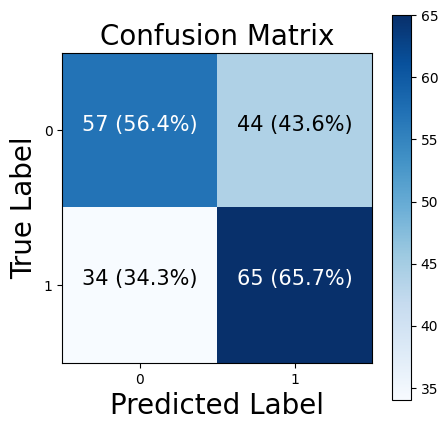

In [62]:
plot_confusion_matrix(y_test, y_preds, 5, 5)

## Working with a larger example (multi-class classification)

When you have more than 2 classes as an option, it's known as multiclass classification.  This means if you have 3 different classes, it's multiclass classification.  It also means if you have 100 different classes it's multiclass classification.

To practice multiclass classification we are going to build a neural network to classify images of different images of clothing.



In [63]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [64]:
# show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")
len(test_labels)

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

10000

In [65]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

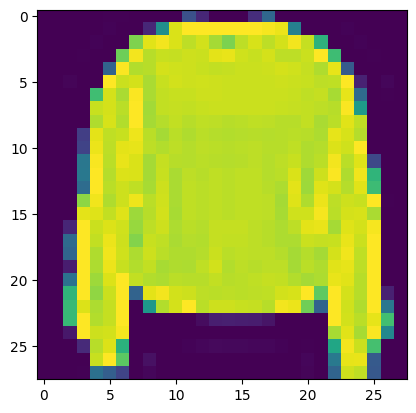

In [66]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [67]:
#check out samples label
train_labels[5]

2

In [68]:
# Create a small list so we can index on our training labels so they are human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

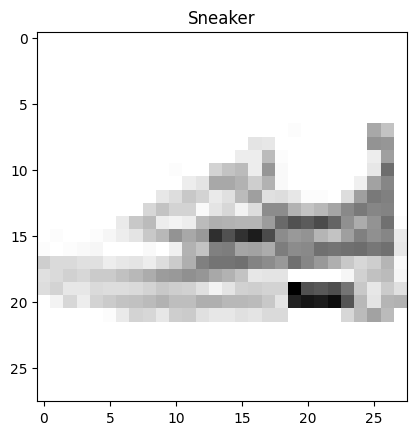

In [69]:
#plot an example image and its label
index_of_choice = 2001
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

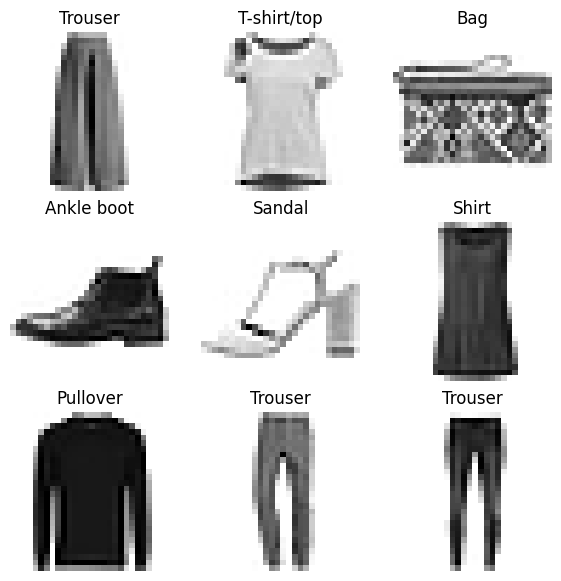

In [70]:
#Plot multiple random images of fashion_mnist
import random
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

For our multiclass classification model we can use a similar architecture to our binary classifiers but we must tweak a few things:

*   Input shape (28 x 28) (the shape of one image)
*   Output shape (10) - one per class of clothing
*   Loss functtion - tf.keras.losses.CategorialCrossentropy
  * if your labels are one-hot encoded, use CategorialCrossentropy, and if your labels are integer-form, use SpareCategorialCrossentropy
*   Output layer activation - softmax (not sigmoid)






In [71]:
#our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [72]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [73]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

#Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

#Fit the model
non_norm_history = model_12.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5723 - accuracy: 0.0985 - val_loss: 2.3030 - val_accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.0997 - val_loss: 2.3019 - val_accuracy: 0.1004
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3020 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy:

In [74]:
#Check the model summary
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled, this means they like to have numbers in the tensors they try to find patterns in to be between 0 and 1.

In [76]:
# We can get our training and test data between 0 and 1 by dividing by the maximum.

train_data_norm = train_data / 255
test_data_norm = test_data / 255

train_data_norm.min(), train_data_norm.max()
test_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [77]:
#Now our data is normalized, let's buidl a model to find patterns in it

#set random seed
tf.random.set_seed(42)

#Creat the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

#Fit the model
norm_history = model_13.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6803 - accuracy: 0.3231 - val_loss: 1.3937 - val_accuracy: 0.3909
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2737 - accuracy: 0.4584 - val_loss: 1.1755 - val_accuracy: 0.5211
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0998 - accuracy: 0.5413 - val_loss: 1.0645 - val_accuracy: 0.5948
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9554 - accuracy: 0.6290 - val_loss: 0.9355 - val_accuracy: 0.6441
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8638 - accuracy: 0.6765 - val_loss: 0.8420 - val_accuracy: 0.6815
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7911 - accuracy: 0.7111 - val_loss: 0.8019 - val_accuracy: 0.7084
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7557 - accuracy: 0.7238 - val_loss: 0.7577 - val_accuracy:

In [78]:
model_13.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 Neural networks tend to prefer data in numerical form as well as normalized as well as scaled/normalized (numbers between 0 and 1).

<Axes: >

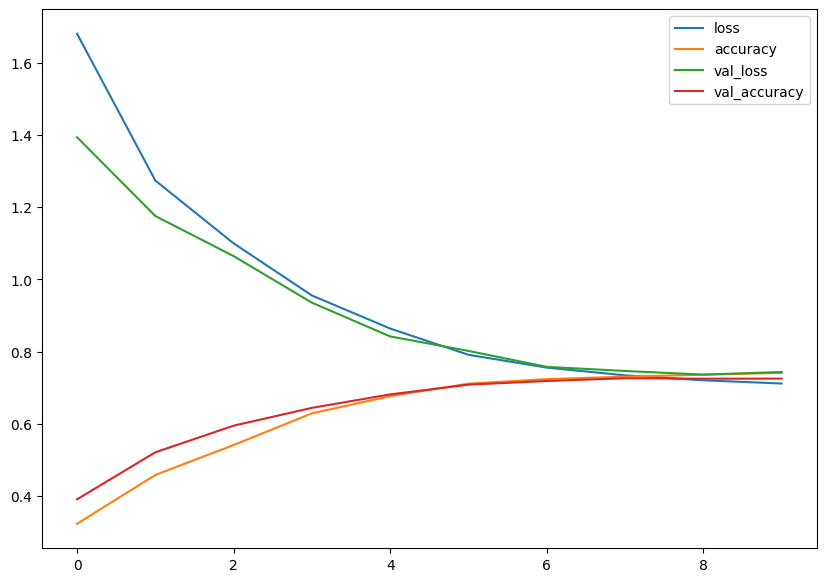

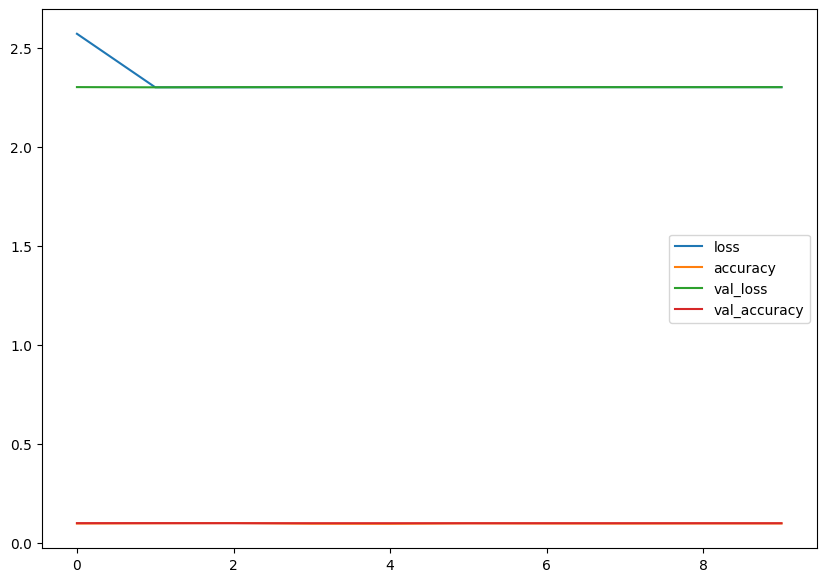

In [79]:
#check out the data
pd.DataFrame(norm_history.history).plot(figsize=(10,7))
pd.DataFrame(non_norm_history.history).plot(figsize=(10,7))

> 🔑 The same model with even slightly different data can produce dramatically different results.
When you are comparing models, you must compare them on the same criteria. eg.
same architecture but different data, OR same data with different architecture

# Finding the ideal learning rate

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
find_lr_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0170 - accuracy: 0.5987 - val_loss: 0.7730 - val_accuracy: 0.7191 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6992 - accuracy: 0.7468 - val_loss: 0.7024 - val_accuracy: 0.7470 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6475 - accuracy: 0.7671 - val_loss: 0.6781 - val_accuracy: 0.7494 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6251 - accuracy: 0.7750 - val_loss: 0.6436 - val_accuracy: 0.7671 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6146 - accuracy: 0.7793 - val_loss: 0.6296 - val_accuracy: 0.7760 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6053 - accuracy: 0.7826 - val_loss: 0.6756 - val_accuracy: 0.7663 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

10000

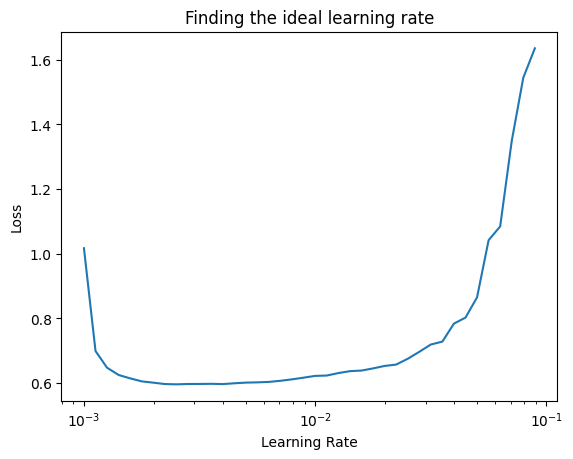

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
len(test_labels)

In [ ]:
#Let's refit the model with the ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Create model
model_15=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(lr=0.001),
                           metrics="accuracy")

#fit the model
history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4818 - accuracy: 0.4207 - val_loss: 1.2369 - val_accuracy: 0.5273
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1231 - accuracy: 0.5555 - val_loss: 1.0542 - val_accuracy: 0.5678
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9942 - accuracy: 0.5898 - val_loss: 0.9423 - val_accuracy: 0.6569
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8636 - accuracy: 0.6732 - val_loss: 0.8259 - val_accuracy: 0.6933
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7898 - accuracy: 0.7027 - val_loss: 0.7777 - val_accuracy: 0.7175
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7495 - accuracy: 0.7218 - val_loss: 0.7635 - val_accuracy: 0.7271
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7135 - accuracy: 0.7387 - val_loss: 0.7345 - val_accuracy:

## Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:
* Evaluate its performance using other classification metrics (like confusion matrix)
* Assess some of its predictions (through visualisations)
* Improve its results (by training it for longer or improving the architecture)
* Save and export it for use in an application

Let's go through the top 2

In [ ]:
#Create a confusion matrix

#Note the confusion matrix code we are about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set the threshold for different colours
  threshold = (cm.max() + cm.min()) / 2

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#make some predicitons with our model
y_probs = model_15.predict(test_data) #probs is short for prediction probabilities

#View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.77349562e-03, 9.69726861e-01, 2.98456380e-05, 2.70740744e-02,
        5.99373925e-05, 1.08602384e-04, 2.21964612e-04, 1.19555955e-06,
        2.03217405e-06, 2.01771195e-06],
       [2.77349562e-03, 9.69726861e-01, 2.98456380e-05, 2.70740744e-02,
        5.99373925e-05, 1.08602384e-04, 2.21964612e-04, 1.19555955e-06,
        2.03217405e-06, 2.01771195e-06],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 0.00000000e+00,
        2.40705703e-33, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.36126798e-30, 0.00000000e+00]], dtype=float32)

In [ ]:
test_data[0], test_data_norm[0]
#make_confusion_matrix()

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

🔑 ** Note: ** Remember to make predictions on the same kind of data your model was trained on (if your model was trained on normalized data, you'll want to make predictions on normalized data).  

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]
#class_names

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]



array([9, 2, 1, 1, 2, 1, 4, 4, 9, 7])

In [ ]:
#model_15.evaluate(test_labels, y_preds)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[273,  28,  29,   0, 118,   0,   4,   0, 547,   1],
       [  0, 956,   1,   0,  41,   0,   0,   0,   2,   0],
       [  2,   4, 373,   0, 547,   0,   0,   0,  74,   0],
       [ 15, 137,  23,   3, 800,   0,   0,   0,  22,   0],
       [  1,   0,  30,   0, 965,   0,   0,   0,   4,   0],
       [  2,   2,   2,   0,   3,   6,   0, 774,  25, 186],
       [ 26,   9, 145,   0, 575,   0,   2,   0, 243,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500,   9, 491],
       [  0,   1,  11,   0,  18,   0,   0,   2, 959,   9],
       [  0,   0,   0,   0,   0,   0,   0,   4,  10, 986]])

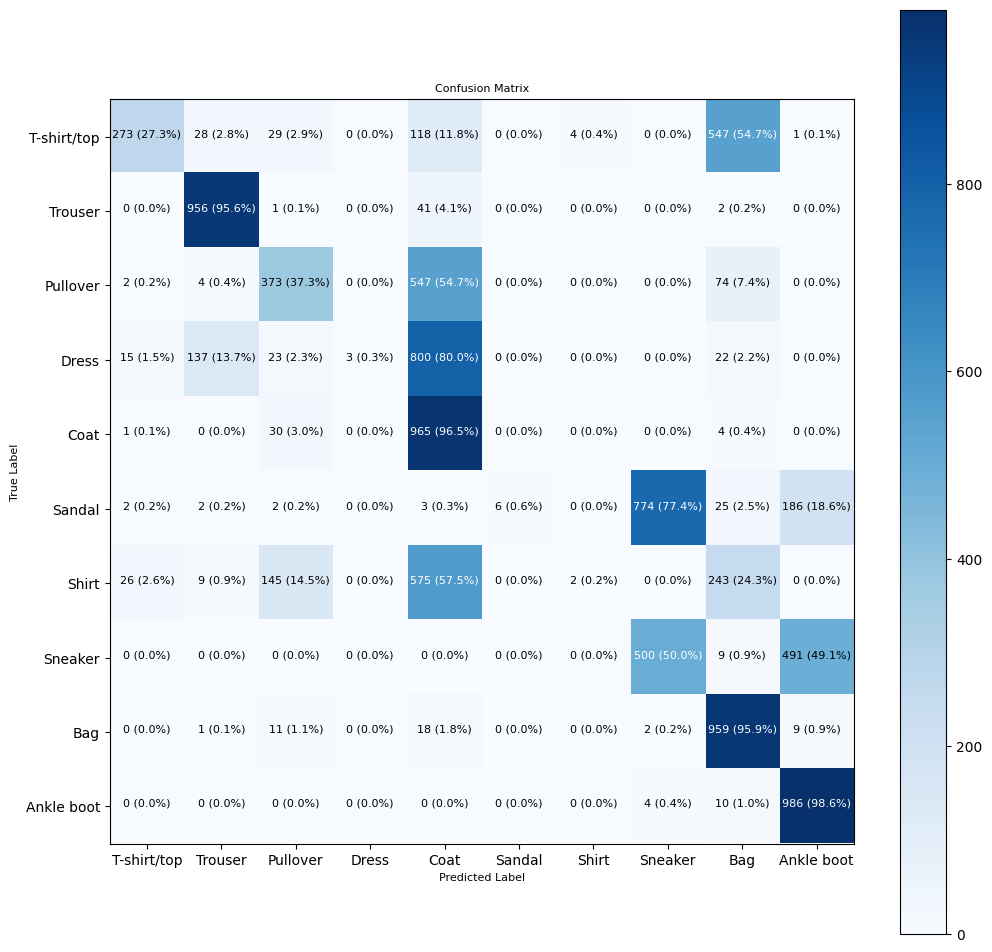

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(12,12),
                      text_size=8)

🔑 ** Note: ** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.  
How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and prediction label



In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''Picks a random image, plots, and predicts it with a prediction and truth label
  '''


  #Plot the image
  plt.figure(figsize=(10,10))
  for j in range(9):
    #Set up a random integer
    i = random.randint(0, len(images))

    #Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    ax = plt.subplot(3,3,j+1)
    plt.imshow(target_image, cmap=plt.cm.binary)


    #Change the colour of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    #Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) #set the colour to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 26ms/step


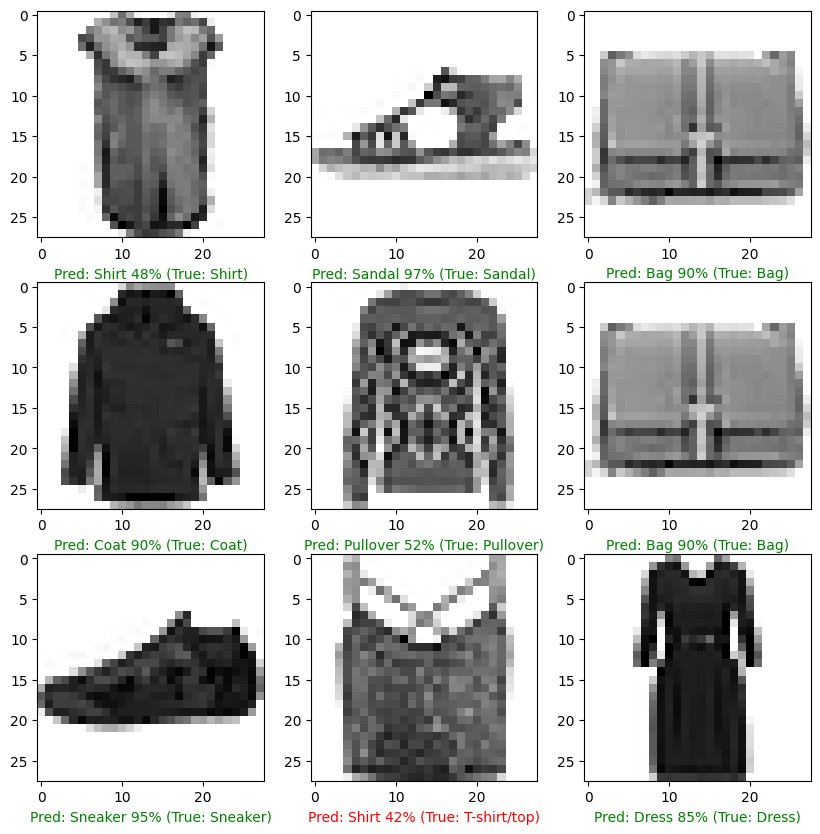

In [ ]:
#Check out a random image as well as its prediction
plot_random_image(model_15, test_data_norm, test_labels, class_names) #always make predictions on the same kind of data your model was trained on

## What patterns is our model learning? ##



In [ ]:
#Find the patterns of our most recent model
model_15.layers

In [ ]:
#Extract a particular layer
model_15.layers[1]


In [ ]:
#Get the patterns of a layer in our network
weights, biases = model_15.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[-0.03447115, -0.1852643 , -0.2710544 ,  0.45770934],
        [ 0.25500003, -0.1656893 , -1.022233  ,  0.61101526],
        [ 0.2830857 , -0.6228206 , -0.32980612,  0.35216096],
        ...,
        [ 0.66099954, -0.2053812 ,  0.40555412,  0.12857781],
        [-0.38875827,  0.3449784 , -0.04665288,  0.85231924],
        [-0.6053504 , -0.7029522 ,  0.42368412,  0.94070375]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...


In [ ]:
biases, biases.shape

(array([2.3931994, 1.2724773, 1.9434619, 1.5127584], dtype=float32), (4,))

Every neuron has a bias vector.  Each of these is paired with a weights matrix.
the bias vector also get initialized as zeroes, at least in the case of a tensorflow dense layer.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_15.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


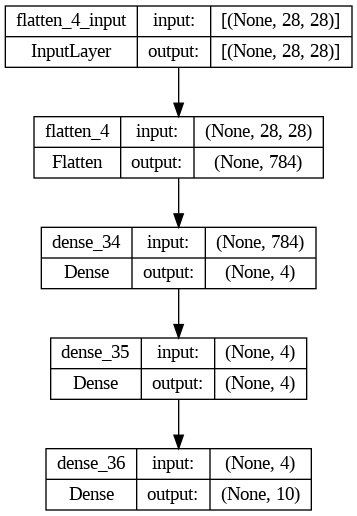

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_15, show_shapes=True)

In [ ]:
#Next, check out exercises and extra curriculum